In [1]:
import torch

In [2]:
from IPython.display import Image

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15967, done.
remote: Total 15967 (delta 0), reused 0 (delta 0), pack-reused 15967
Receiving objects: 100% (15967/15967), 14.56 MiB | 5.97 MiB/s, done.
Resolving deltas: 100% (10966/10966), done.


In [5]:
%cd yolov5

/content/yolov5


In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [8]:
from tqdm import tqdm
import IProgress
from ipywidgets import IntProgress

In [7]:
!pip install IProgress

In [4]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: dataset/train/
   creating: dataset/train/images/
  inflating: dataset/train/images/Atopic Dermatitis(0).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(1).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(10).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(11).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(12).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(13).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(14).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(15).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(16).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(17).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(18).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(19).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(2).jpg  
  inflating: dataset/train/images/Atopic Dermatitis(20).jpg  
  inflating: dataset/train/images/Atopic 

In [13]:
!python train.py --patience 0 --img 640 --batch 16 --epochs 600 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

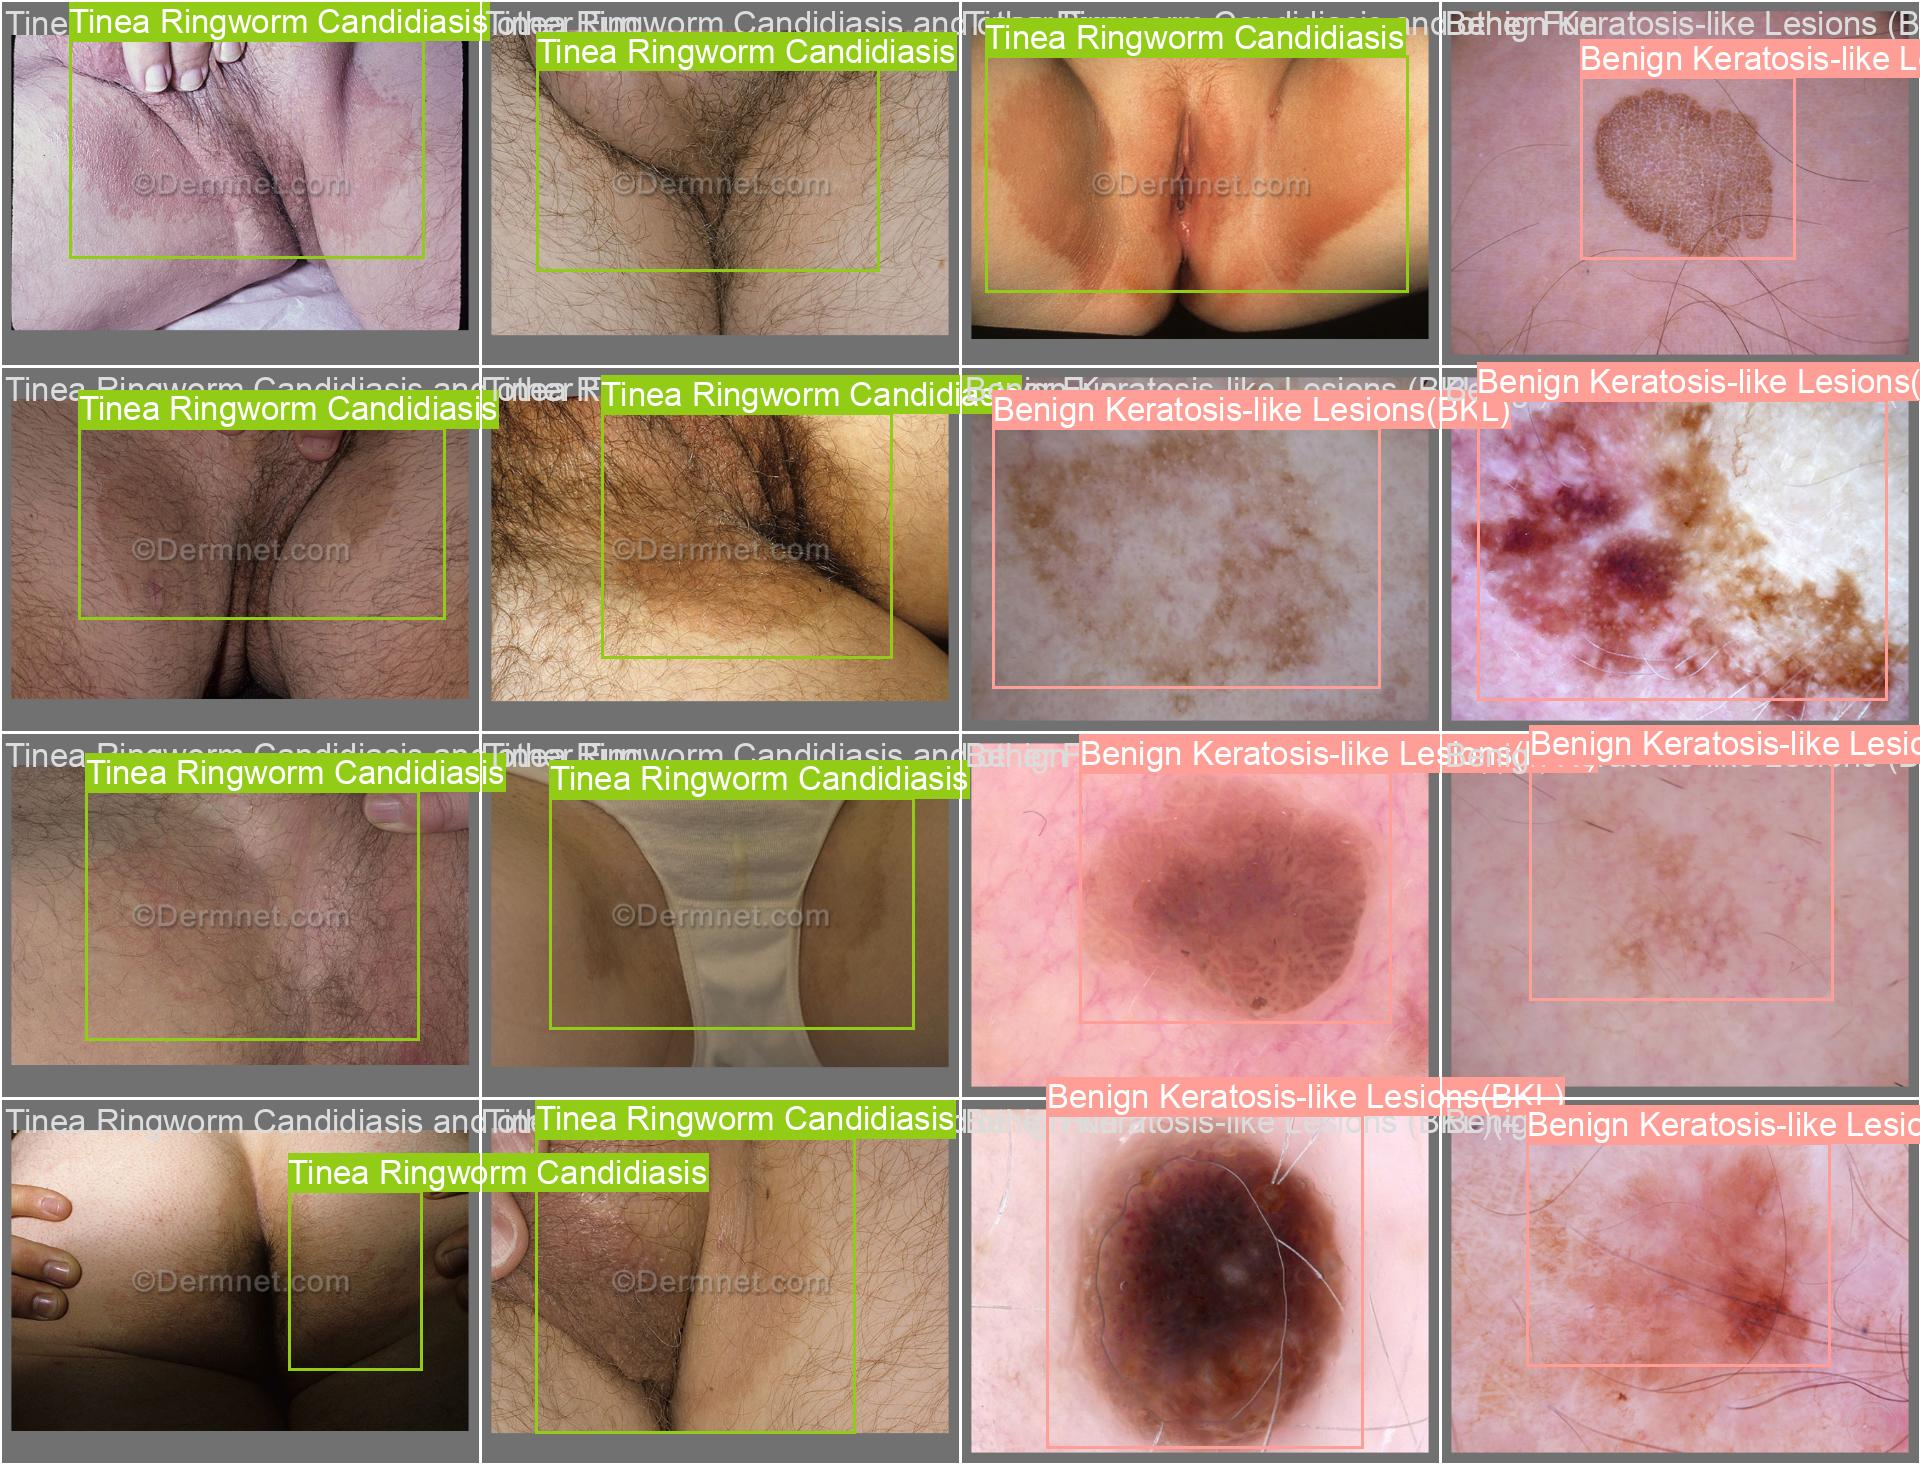

In [14]:
Image(filename='runs/train/exp2/val_batch0_labels.jpg', width=1000)

In [16]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/dataset/val/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/dataset/val/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/80 /content/dataset/val/images/Atopic Dermatitis(40).jpg: 512x640 1 Eczema, 43.3ms
image 2/80 /content/dataset/val/images/Atopic Dermatitis(41).jpg: 512x640 2 Atopic Dermatitiss, 9.5ms
image 3/80 /content/dataset/val/images/Atopic Dermatitis(42).jpg: 512x640 1 Atopic Dermatitis, 9.5ms
image 4/80 /content/dataset

In [18]:
!python export.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --int8 --include tflite --img 640 --data dataset.yaml

export: data=dataset.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=True, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp2/weights/best.pt with output shape (1, 25200, 13) (13.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0...

                 from  n    params  module                                  arguments                     
2023-09-15 11:24:03.209856: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
 

In [19]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best-int8.tflite --img 640 --conf 0.25 --source /content/dataset/val/images --data dataset_new.yaml

detect: weights=['/content/yolov5/runs/train/exp2/weights/best-int8.tflite'], source=/content/dataset/val/images, data=dataset_new.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/yolov5/runs/train/exp2/weights/best-int8.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/80 /content/dataset/val/images/Atopic Dermatitis(40).jpg: 640x640 1 Eczema, 315.8ms
image 2/80 /content/dataset/val/images/Atopic Dermatitis(41).jpg: 640x640 2 Atopic Dermatitiss, 286.0ms
image 3/80 /content/dataset/val/image